In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
#Leemos los archvivos csv
akash_df=pd.read_csv('csv_monedas/akash_df')
singularitynet_df=pd.read_csv('csv_monedas/singularitynet_df')
render_token_df=pd.read_csv('csv_monedas/render_token_df')
origintrail_df=pd.read_csv('csv_monedas/origintrail_df')
ocean_df=pd.read_csv('csv_monedas/ocean_df')
numeraire_df=pd.read_csv('csv_monedas/numeraire_df')
insure_df=pd.read_csv('csv_monedas/insure_df')
iexec_rlc_df=pd.read_csv('csv_monedas/iexec_rlc_df')
fetch_ai_df=pd.read_csv('csv_monedas/fetch_ai_df')
everipedia_df=pd.read_csv('csv_monedas/everipedia_df')

df_price=pd.read_csv('csv_monedas/df_price')
df_market=pd.read_csv('csv_monedas/df_market')
df_volumen=pd.read_csv('csv_monedas/df_volumen')

In [4]:
total_data_historica=pd.read_csv('csv_monedas/total_data_historica')


In [4]:
#Creamos la columna Anio
df_price.dtypes
df_price['Fecha'] = pd.to_datetime(df_price['Fecha'])
df_price['Anio'] = df_price['Fecha'].dt.year

In [78]:
#Función que devuelve el máximo y mínimo histórico
def valor_max_min(columna):
    max = df_price[columna].max()
    min = df_price[columna].min()
    media= df_price[columna].mean()
    return {'Máximo Histórico (USD)': max, 'Mínimo Histórico (USD)':min,'Media histórica (USD)':media}

In [5]:
#Esta función detecta la cantidad de outliers por año en forma de diccionario junto con los bigotes inferior y superior
def outliers_moneda(moneda:str):
    summary_stats = df_price[moneda].describe()
    # Calcular rango intercuartil (IQR) para cada columna
    Q1 = summary_stats.loc['25%']
    Q3 = summary_stats.loc['75%']
    IQR = Q3 - Q1
    # Calcular límites para identificar outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Identificar outliers
    df_outliers=df_price[((df_price[moneda] < lower_limit) | (df_price[moneda] > upper_limit))]
    y=dict(df_outliers['Anio'].value_counts())
    count=df_outliers[moneda].count()
    return print('Existe un total de',count,'outliers, en los años:',y,'fuera de este rango:[',lower_limit,'-', upper_limit,']')

# Análisis de precio HISTÓRICO de cada Moneda

# Insure

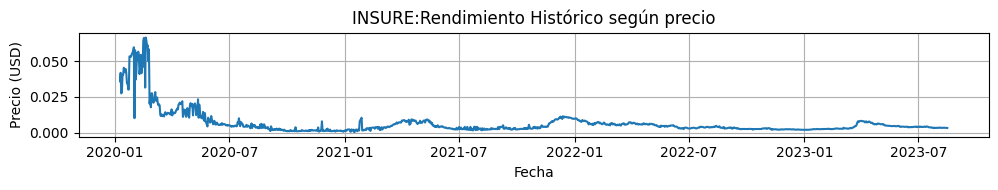

In [7]:
plt.figure(figsize=(10,2))
x_values = df_price['Fecha']
y_values = df_price['Insure']
plt.plot(x_values, y_values)

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("INSURE:Rendimiento Histórico según precio")
plt.tight_layout()
plt.grid(True)
plt.show()


In [63]:
outliers_moneda('Insure')

Existe un total de 118 outliers, en los años: {2020: 118} fuera de este rango:[ -0.0032954901862747247 - 0.012118752520590475 ]


In [79]:
valor_max_min('Insure')

{'Máximo Histórico (USD)': 0.0665296157568335,
 'Mínimo Histórico (USD)': 0.0003533835537825,
 'Media histórica (USD)': 0.006460352195129587}

Análisis ANUAL del precio histórico de la moneda: Se calcula, promedio,desviación estándar, máx, mín, etc. 

In [10]:
insure_df['fecha'] = pd.to_datetime(insure_df['fecha'])
insure_df['Anio'] = insure_df['fecha'].dt.year
y=insure_df.groupby('Anio')['price_insure'].describe()
pd.DataFrame(y)
y=y.reset_index()
y

,Anio,count,mean,std,min,25%,50%,75%,max
0,2020,358.0,0.012268,0.015637,0.000563,0.001725,0.005405,0.015561,0.066530
1,2021,365.0,0.004499,0.002724,0.000353,0.002462,0.003558,0.006679,0.011410
2,2022,365.0,0.004255,0.001839,0.001878,0.002550,0.003803,0.005729,0.009887
3,2023,228.0,0.004011,0.001608,0.001883,0.002674,0.003780,0.004590,0.008153


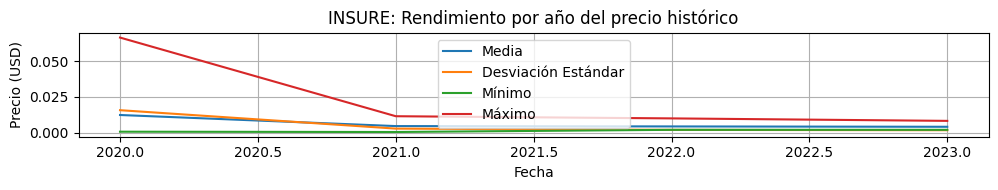

In [11]:
plt.figure(figsize=(10, 2))

# Plot de las series
plt.plot(y['Anio'], y['mean'], label='Media')
plt.plot(y['Anio'], y['std'], label='Desviación Estándar')
plt.plot(y['Anio'], y['min'], label='Mínimo')
plt.plot(y['Anio'], y['max'], label='Máximo')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("INSURE: Rendimiento por año del precio histórico")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()


* El único punto alto observable del promedio del precio fue en 2020 de 0.012268 USD, de ahí disminuyó hasta alcanzar un valor de 0.004011 en 2023. 

+ El precio máximo de la moneda lo tuvo en 2020 con un valor de 0.066530 USD, para 2021-2023  ha ido disminuyendo hasta alcazar los 0.008153 USD.

* El precio mínimo de la moneda ha ido en aumento, en 2020 con un valor de 0.001725 hasta 2023 con un valor de 0.001883.

* Para cada año, existe poca variabilidad con respecto de la media lo que indicaría que el precio se ha mantenido constante, es decir, no muestra ningún tipo de cambio o volatilidad abrusco. 

# Iexec_rlc

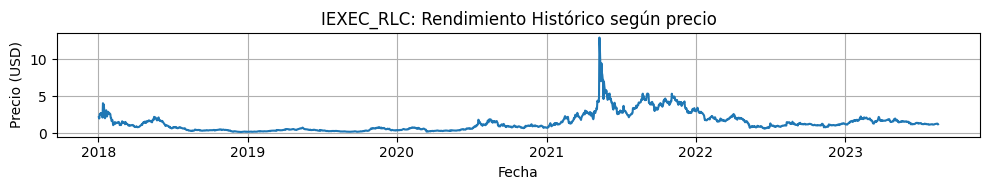

In [12]:
plt.figure(figsize=(10,2))
x_values = df_price['Fecha']
y_values = df_price['Iexec_rlc']
plt.plot(x_values, y_values)

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("IEXEC_RLC: Rendimiento Histórico según precio")
plt.tight_layout()
plt.grid(True)
plt.show()

In [13]:
#OUTLIERS
outliers_moneda('Iexec_rlc')

Existe un total de 148 outliers, en los años: {2021: 145, 2018: 3} fuera de este rango:[ -1.4504697016808639 - 3.6952471920243517 ]


In [80]:
#MÁXIMO, MÍNIMO Y PROMEDIO HISTÓRICO
valor_max_min('Iexec_rlc')

{'Máximo Histórico (USD)': 12.959429493578156,
 'Mínimo Histórico (USD)': 0.1538145781687333,
 'Media histórica (USD)': 1.3921556276076157}

Análisis ANUAL del precio histórico de la moneda: Se calcula, promedio,desviación estándar, máx, mín, etc.

In [14]:
iexec_rlc_df['fecha'] = pd.to_datetime(iexec_rlc_df['fecha'])
iexec_rlc_df['Anio'] = iexec_rlc_df['fecha'].dt.year
y2=iexec_rlc_df.groupby('Anio')['price_iexec_rlc'].describe()
pd.DataFrame(y2)
y2=y2.reset_index()
y2

,Anio,count,mean,std,min,25%,50%,75%,max
0,2018,364.0,0.973843,0.728938,0.153815,0.396215,0.792396,1.425824,4.053525
1,2019,365.0,0.382307,0.155975,0.173727,0.247524,0.346137,0.490060,0.818970
2,2020,366.0,0.757100,0.378032,0.210901,0.423487,0.727048,0.973637,1.878244
3,2021,365.0,3.333770,1.555600,0.713017,2.363318,3.175563,4.153601,12.959429
4,2022,365.0,1.413608,0.565069,0.614441,1.024958,1.211729,1.805230,3.444997
5,2023,228.0,1.553435,0.275359,1.145853,1.284764,1.566152,1.742168,2.259683


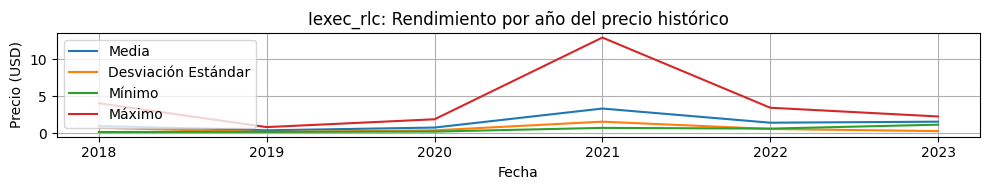

In [15]:
plt.figure(figsize=(10, 2))
# Plot de las series
plt.plot(y2['Anio'], y2['mean'], label='Media')
plt.plot(y2['Anio'], y2['std'], label='Desviación Estándar')
plt.plot(y2['Anio'], y2['min'], label='Mínimo')
plt.plot(y2['Anio'], y2['max'], label='Máximo')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("Iexec_rlc: Rendimiento por año del precio histórico")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* Existe un punto alto observable en el promedio del precio para 2021 con 12.959429 USD. 

+ El precio máximo de la moneda lo tuvo en 2021 con un valor de 12.959429, para el resto de los años se ha mantenido por debajo de los 5 USD.

* El precio mínimo de la moneda de 2018-2020 se mantuvo constante al rededor de los 0.2 USD , en 2021 presentó el primer aumento significativo del precio mínimo hasta alcanzar los 0.713017 USD (es decir, se triplicó su mínimo). Por último, de 2022-2023 aumentó de nuevo su precio mínimo alcanzando los 1.145853 USD. Es decir, el precio mínimo ha aumentado a través de los años.

* Existe poca variabilidad con respecto de la media lo que indicaría que el precio se ha mantenido constante, sin embargo, en 2021 se presenta la mayor variabilidad con respecto a la media del precio de la moneda (1.555600)

# Fetch_ai

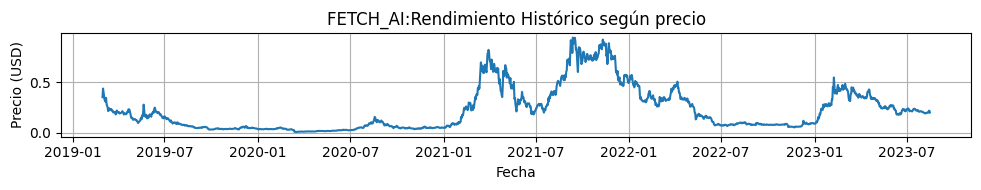

In [16]:
plt.figure(figsize=(10,2))
x_values = df_price['Fecha']
y_values = df_price['Fetch_ai']
plt.plot(x_values, y_values)

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("FETCH_AI:Rendimiento Histórico según precio")
plt.tight_layout()
plt.grid(True)
plt.show()


In [17]:
#OUTLIERS
outliers_moneda('Fetch_ai')

Existe un total de 62 outliers, en los años: {2021: 62} fuera de este rango:[ -0.35890397947785885 - 0.7490261027155437 ]


In [81]:
#MÁXIMO, MÍNIMO Y PROMEDIO HISTÓRICO
valor_max_min('Fetch_ai')

{'Máximo Histórico (USD)': 0.9446485877842185,
 'Mínimo Histórico (USD)': 0.0098755289769342,
 'Media histórica (USD)': 0.2253400943913922}

Análisis ANUAL del precio histórico de la moneda: Se calcula, promedio,desviación estándar, máx, mín, etc.

In [18]:
fetch_ai_df['fecha'] = pd.to_datetime(fetch_ai_df['fecha'])
fetch_ai_df['Anio'] = fetch_ai_df['fecha'].dt.year
y3=fetch_ai_df.groupby('Anio')['price_fetch_ai'].describe()
pd.DataFrame(y3)
y3=y3.reset_index()
y3

,Anio,count,mean,std,min,25%,50%,75%,max
0,2019,306.0,0.116408,0.079002,0.033916,0.049280,0.089119,0.182219,0.439896
1,2020,366.0,0.045508,0.026489,0.009876,0.027454,0.041951,0.053497,0.159405
2,2021,365.0,0.488780,0.243831,0.051449,0.278273,0.502935,0.710517,0.944649
3,2022,365.0,0.192130,0.141979,0.055220,0.081950,0.099284,0.324070,0.574358
4,2023,228.0,0.291646,0.092693,0.091681,0.220427,0.266034,0.364383,0.549179


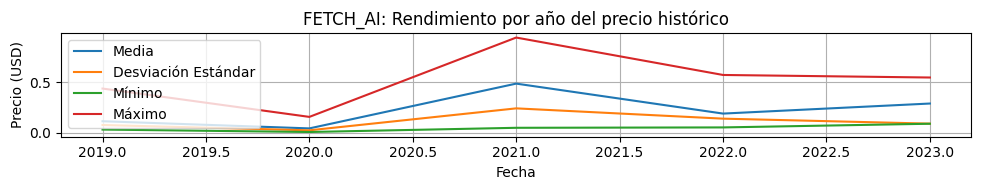

In [19]:
plt.figure(figsize=(10, 2))
# Plot de las series
plt.plot(y3['Anio'], y3['mean'], label='Media')
plt.plot(y3['Anio'], y3['std'], label='Desviación Estándar')
plt.plot(y3['Anio'], y3['min'], label='Mínimo')
plt.plot(y3['Anio'], y3['max'], label='Máximo')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("FETCH_AI: Rendimiento por año del precio histórico")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* Existe un punto alto observable en el promedio del precio para 2021 de 0.488780 USD. 

+ Para los años 2019-2020 el precio máximo no superaba los 0.5 USD. El punto más alto del precio máx lo tuvo en 2021 con un valor de 0.944649. En los años posteriores a eso ha ido en descenso pero se ha mantenido arriba de los 0.5 USD

* El precio mínimo de la moneda ha aumentado a través de los años, en 2019 empezó 0.033916 USD y en 2023 alcanzó un valor de 0.091681 USD. 

* De 2019-2020 existe poca variabilidad con respecto de la media lo que indicaría que el precio se ha mantenido constante, sin embargo, en 2021 se presenta la mayor variabilidad con respecto a la media del precio (0.243831). Para los años 2022-2023 ha ido disminuyendo (0.092693 )hasta alcanzar casi el mismo valor que tenía en 2019 (0.079002)

# Everipedia

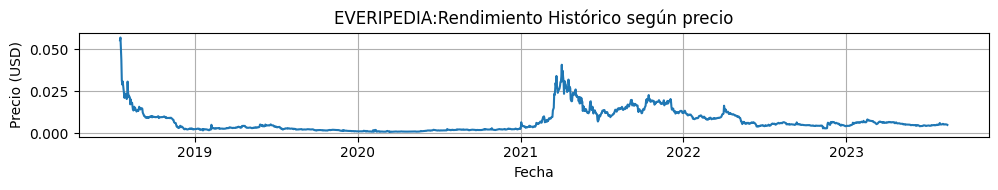

In [20]:
plt.figure(figsize=(10,2))
x_values = df_price['Fecha']
y_values = df_price['Everipedia']
plt.plot(x_values, y_values)

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("EVERIPEDIA:Rendimiento Histórico según precio")
plt.tight_layout()
plt.grid(True)
plt.show()


In [21]:
#OUTLIERS
outliers_moneda('Everipedia')

Existe un total de 86 outliers, en los años: {2021: 62, 2018: 24} fuera de este rango:[ -0.0082751447318497 - 0.0200916068450887 ]


In [82]:
#MÁXIMO, MÍNIMO Y PROMEDIO HISTÓRICO
valor_max_min('Everipedia')

{'Máximo Histórico (USD)': 0.0569199253302078,
 'Mínimo Histórico (USD)': 0.0007878729928834,
 'Media histórica (USD)': 0.006952840039613007}

Análisis ANUAL del precio histórico de la moneda: Se calcula, promedio,desviación estándar, máx, mín, etc.

In [22]:
everipedia_df['fecha'] = pd.to_datetime(everipedia_df['fecha'])
everipedia_df['Anio'] = everipedia_df['fecha'].dt.year
y4=everipedia_df.groupby('Anio')['price_everipedia'].describe()
pd.DataFrame(y4)
y4=y4.reset_index()
y4

,Anio,count,mean,std,min,25%,50%,75%,max
0,2018,168.0,0.011469,0.009112,0.002312,0.005757,0.009637,0.014053,0.056920
1,2019,365.0,0.002774,0.000957,0.001132,0.002016,0.002674,0.003348,0.005329
2,2020,366.0,0.001716,0.000559,0.000788,0.001120,0.001765,0.002202,0.003041
3,2021,365.0,0.015024,0.006802,0.002957,0.011249,0.014328,0.018885,0.040766
4,2022,365.0,0.007017,0.002671,0.002909,0.004904,0.006038,0.009103,0.016407
5,2023,228.0,0.005697,0.000937,0.004184,0.004880,0.005535,0.006524,0.008244


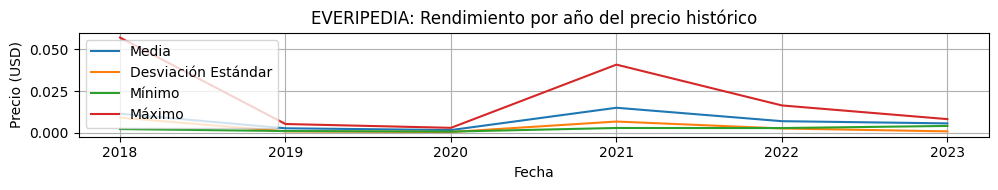

In [23]:
plt.figure(figsize=(10, 2))
# Plot de las series
plt.plot(y4['Anio'], y4['mean'], label='Media')
plt.plot(y4['Anio'], y4['std'], label='Desviación Estándar')
plt.plot(y4['Anio'], y4['min'], label='Mínimo')
plt.plot(y4['Anio'], y4['max'], label='Máximo')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("EVERIPEDIA: Rendimiento por año del precio histórico")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* Existe un punto alto observable en el promedio del precio para 2021 de 0.015024 USD, muy cercano en precio del año 2018 0.011469 USD. Para los años 2022-2023 ha ido decreciendo su valor hasta alcanzar los 0.005697 USD. 

+ El punto más alto del precio máx lo tuvo en 2018 con un valor de 0.056920 USD hasta alcanzar en 2023 un valor de 0.008244 USD. A pesar de que en 2021 se recuperó un poco con  un valor de 0.040766 USD, el precio máximo de EVERIPEDIA en general ha ido decreciendo.

* El precio mínimo de la moneda ha aumentado a través de los años, en 2018 empezó 0.002312 USD y en 2023 alcanzó un valor de 0.004184 USD, es decir ha duplicado su precio mínimo.

* En 2018 se presenta la mayor variabilidad con respecto a la media del precio (0.009112). De 2019-2020 existe poca variabilidad con respecto de la media lo que indicaría que el precio se ha mantenido constante, sin embargo, en 2021 vuelve a aumentar la variabilidad alcanzando un valor de (0.006802). Para los años 2022-2023 ha ido disminuyendo (0.000937) hasta alcanzar casi el mismo valor que tuvo en 2019  (0.000957).

# Singularitynet

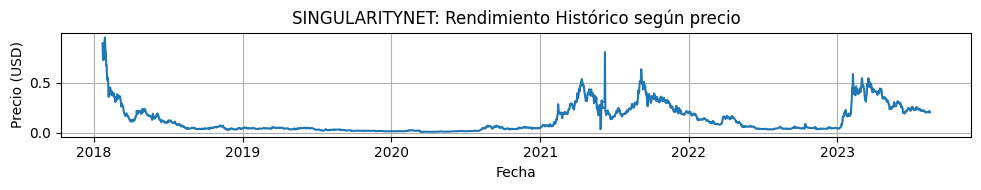

In [24]:
plt.figure(figsize=(10,2))
x_values = df_price['Fecha']
y_values = df_price['Singularitynet']
plt.plot(x_values, y_values)

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("SINGULARITYNET: Rendimiento Histórico según precio")
plt.tight_layout()
plt.grid(True)
plt.show()


In [25]:
#OUTLIERS
outliers_moneda('Singularitynet')

Existe un total de 61 outliers, en los años: {2021: 24, 2023: 21, 2018: 16} fuera de este rango:[ -0.20703387714964966 - 0.4510387619484894 ]


In [83]:
#MÁXIMO, MÍNIMO Y PROMEDIO HISTÓRICO
valor_max_min('Singularitynet')

{'Máximo Histórico (USD)': 0.9502300291564426,
 'Mínimo Histórico (USD)': 0.0098531262683298,
 'Media histórica (USD)': 0.13203574411789062}

Análisis ANUAL del precio histórico de la moneda: Se calcula, promedio,desviación estándar, máx, mín, etc.

In [26]:
singularitynet_df['fecha'] = pd.to_datetime(singularitynet_df['fecha'])
singularitynet_df['Anio'] = singularitynet_df['fecha'].dt.year
y5=singularitynet_df.groupby('Anio')['price_singularitynet'].describe()
pd.DataFrame(y5)
y5=y5.reset_index()
y5

,Anio,count,mean,std,min,25%,50%,75%,max
0,2018,344.0,0.151983,0.159901,0.031214,0.047151,0.103593,0.182380,0.950230
1,2019,365.0,0.035373,0.011858,0.015996,0.022683,0.034482,0.046281,0.058993
2,2020,366.0,0.030758,0.017569,0.009853,0.016921,0.021478,0.046526,0.073134
3,2021,364.0,0.263059,0.115948,0.037961,0.191143,0.248257,0.331971,0.804910
4,2022,365.0,0.078684,0.045709,0.035022,0.043864,0.054394,0.108622,0.212791
5,2023,228.0,0.295495,0.114520,0.045208,0.219169,0.261078,0.401839,0.586830


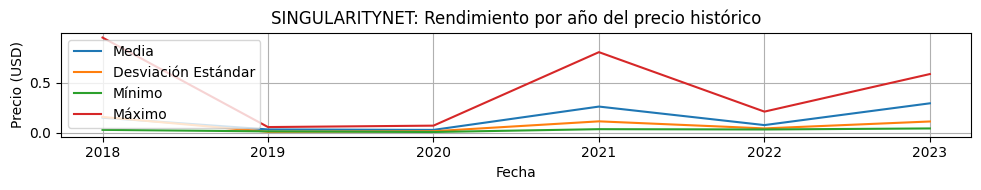

In [27]:
plt.figure(figsize=(10, 2))
# Plot de las series
plt.plot(y5['Anio'], y5['mean'], label='Media')
plt.plot(y5['Anio'], y5['std'], label='Desviación Estándar')
plt.plot(y5['Anio'], y5['min'], label='Mínimo')
plt.plot(y5['Anio'], y5['max'], label='Máximo')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("SINGULARITYNET: Rendimiento por año del precio histórico")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* El promedio del precio, en general, ha ido en aumento. En 2018 empezó con valor de 0.151983 USD hasta alcanzar en 2023 los 0.295495 USD promedio. Es decir, casi ha duplicado su precio.

+ El punto más alto del precio máx lo tuvo en 2018 con un valor de 0.950230 USD hasta alcanzar en 2020 un valor de 0.073134 USD. A pesar de que en 2021 se recuperó un poco alcanzando un valor de 0.804910 USD, el precio máximo de EVERIPEDIA en general decreció.

* El precio mínimo de la moneda ha aumentado a través de los años, en 2018 empezó 0.031214 USD y en 2023 alcanzó un valor de 0.045208. 

* En 2018 se presenta la mayor variabilidad con respecto a la media del precio (0.159901). De 2019-2020 existe poca variabilidad con respecto de la media lo que indicaría que el precio se ha mantenido constante, sin embargo, en 2021 vuelve ala variabilidad vuelve a aumentar alcanzando un valor de (0.115948). A pesar de tener un pico bajo en 2022,vuelve a recuperar una volatilidad de 0.114520. 

# Akash

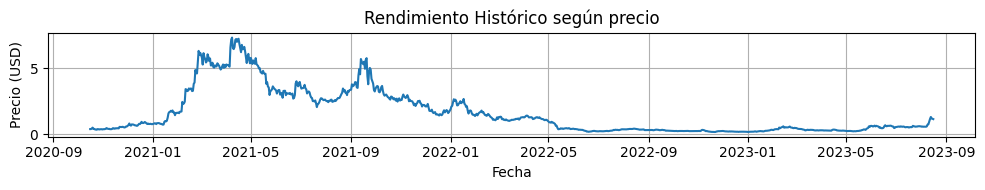

In [28]:
plt.figure(figsize=(10,2))
x_values = df_price['Fecha']
y_values = df_price['Akash']
plt.plot(x_values, y_values)

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("Rendimiento Histórico según precio")
plt.tight_layout()
plt.grid(True)
plt.show()


In [29]:
#outliers
outliers_moneda('Akash')

Existe un total de 27 outliers, en los años: {2021: 27} fuera de este rango:[ -2.9803065554113743 - 5.8786011035287125 ]


In [84]:
#MÁXIMO, MÍNIMO Y PROMEDIO HISTÓRICO
valor_max_min('Akash')

{'Máximo Histórico (USD)': 7.316591747578928,
 'Mínimo Histórico (USD)': 0.1819326188074241,
 'Media histórica (USD)': 1.6052876875183373}

Análisis ANUAL del precio histórico de la moneda: Se calcula, promedio,desviación estándar, máx, mín, etc.

In [30]:
#Tabla por año 
akash_df['fecha'] = pd.to_datetime(akash_df['fecha'])
akash_df['Anio'] = akash_df['fecha'].dt.year
y6=akash_df.groupby('Anio')['price_akash'].describe()
pd.DataFrame(y6)
y6=y6.reset_index()
y6

,Anio,count,mean,std,min,25%,50%,75%,max
0,2020,76.0,0.583827,0.178730,0.353433,0.414857,0.549581,0.752367,0.948424
1,2021,365.0,3.445455,1.541322,0.737516,2.488472,3.151670,4.697467,7.316592
2,2022,365.0,0.705510,0.613782,0.181933,0.256467,0.368161,1.157014,2.679760
3,2023,228.0,0.440327,0.189641,0.185293,0.287600,0.392258,0.579461,1.316703


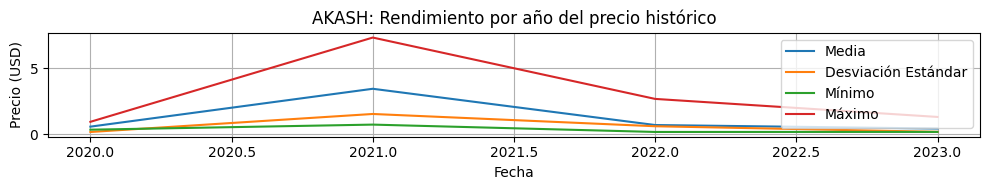

In [31]:
plt.figure(figsize=(10, 2))
#Plot de las series
plt.plot(y6['Anio'], y6['mean'], label='Media')
plt.plot(y6['Anio'], y6['std'], label='Desviación Estándar')
plt.plot(y6['Anio'], y6['min'], label='Mínimo')
plt.plot(y6['Anio'], y6['max'], label='Máximo')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("AKASH: Rendimiento por año del precio histórico")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* A pesar de que en 2021 alcanzó su precio promedio máximo de 3.445455, el promedio del precio ha ido decreciendo hasta alcanzar en 2023 0.440327.

+ El punto más alto del precio máx lo tuvo en 2021 con un valor de 7.316592. DE 2021 a 2023 el precio ha ido decreciendo hasta alcanzar 1.316703 USD

* El precio mínimo de la moneda ha ido decreciendo hasta alcanzar en 2023 0.185293 USD 

* En 2021 se presenta la mayor variabilidad con respecto a la media del precio (1.541322). 

# Ocean

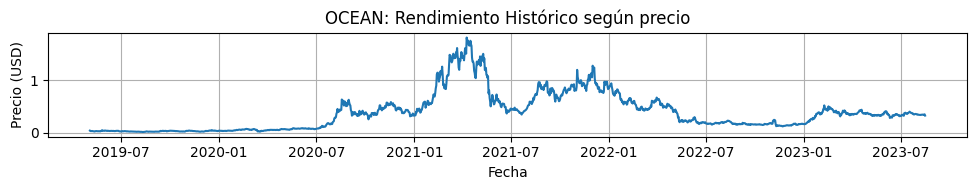

In [32]:
plt.figure(figsize=(10,2))
x_values = df_price['Fecha']
y_values = df_price['Ocean']
plt.plot(x_values, y_values)

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("OCEAN: Rendimiento Histórico según precio")
plt.tight_layout()
plt.grid(True)
plt.show()


In [33]:
#OUTLIERS
outliers_moneda('Ocean')

Existe un total de 68 outliers, en los años: {2021: 68} fuera de este rango:[ -0.6092844636112439 - 1.2158633456091255 ]


In [85]:
#MÁXIMO, MÍNIMO Y PROMEDIO HISTÓRICO
valor_max_min('Ocean')

{'Máximo Histórico (USD)': 1.819268866104512,
 'Mínimo Histórico (USD)': 0.0128483225415933,
 'Media histórica (USD)': 0.3824145832468151}

Análisis ANUAL del precio histórico de la moneda: Se calcula, promedio,desviación estándar, máx, mín, etc.

In [34]:
#Tabla por año 
ocean_df['fecha'] = pd.to_datetime(ocean_df['fecha'])
ocean_df['Anio'] = ocean_df['fecha'].dt.year
y7=ocean_df.groupby('Anio')['price_ocean'].describe()
pd.DataFrame(y7)
y7=y7.reset_index()
y7

,Anio,count,mean,std,min,25%,50%,75%,max
0,2019,242.0,0.028129,0.007259,0.012848,0.021825,0.028770,0.033796,0.046556
1,2020,366.0,0.215878,0.186932,0.020109,0.056914,0.083908,0.389241,0.634125
2,2021,365.0,0.866946,0.352109,0.327632,0.581314,0.822328,1.078858,1.819269
3,2022,365.0,0.317149,0.204440,0.119435,0.164058,0.201542,0.481358,0.943255
4,2023,228.0,0.354596,0.058819,0.163269,0.334037,0.356145,0.382768,0.522183


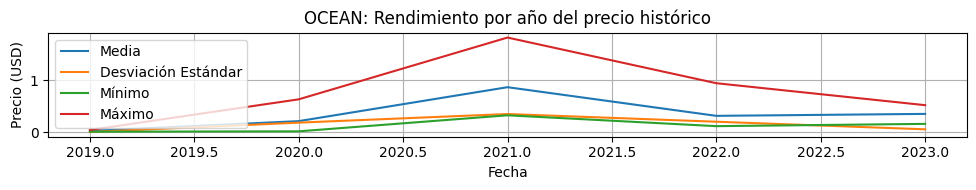

In [35]:
plt.figure(figsize=(10, 2))
# Plot de las series
plt.plot(y7['Anio'], y7['mean'], label='Media')
plt.plot(y7['Anio'], y7['std'], label='Desviación Estándar')
plt.plot(y7['Anio'], y7['min'], label='Mínimo')
plt.plot(y7['Anio'], y7['max'], label='Máximo')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("OCEAN: Rendimiento por año del precio histórico")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* El promedio del precio, en general, ha ido en aumento. En 2019 empezó con valor de 0.028129 USD hasta alcanzar en 2023 los 0.354596 USD promedio.EL promedio de precio más alto que ha tenido es en 2021 con un valor de 0.866946

+ El punto más alto del precio máx lo tuvo en 2021 con un valor de 1.819269 USD. Obviando este máximo, se podría decir que en general el precio ha aumentado (2019: 0.046556) (2023: 0.522183). 

* En general, el precio mínimo de la moneda ha aumentado a través de los años, en 2019 empezó 0.012848 USD y en 2023 alcanzó un valor de 0.163269. Alcanzando su máximo en 2021 con un valor de 0.327632

* En 2021 se presenta la mayor variabilidad con respecto a la media del precio (0.352109). Con respecto al resto de los años (2019,2020,2022,20223) ha habido poca variabilidad con respecto de la media lo que indicaría que el precio se ha mantenido constante. 

# Numeraire

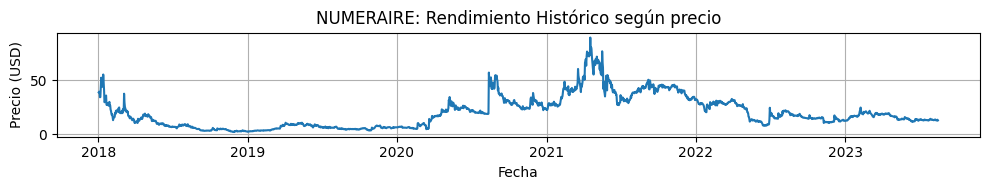

In [36]:
plt.figure(figsize=(10,2))
x_values = df_price['Fecha']
y_values = df_price['Numeraire']
plt.plot(x_values, y_values)

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("NUMERAIRE: Rendimiento Histórico según precio")
plt.tight_layout()
plt.grid(True)
plt.show()

In [37]:
#OUTLIERS
outliers_moneda('Numeraire')

Existe un total de 40 outliers, en los años: {2021: 40} fuera de este rango:[ -22.9469112205283 - 58.882545920275064 ]


In [86]:
#MÁXIMO, MÍNIMO Y PROMEDIO HISTÓRICO
valor_max_min('Numeraire')

{'Máximo Histórico (USD)': 89.4454513855164,
 'Mínimo Histórico (USD)': 2.064246837714778,
 'Media histórica (USD)': 19.83484124898439}

Análisis ANUAL del precio histórico de la moneda: Se calcula, promedio,desviación estándar, máx, mín, etc.

In [38]:
#Tabla por año 
numeraire_df['fecha'] = pd.to_datetime(numeraire_df['fecha'])
numeraire_df['Anio'] = numeraire_df['fecha'].dt.year
y8=numeraire_df.groupby('Anio')['price_numeraire'].describe()
pd.DataFrame(y8)
y8=y8.reset_index()
y8

,Anio,count,mean,std,min,25%,50%,75%,max
0,2018,364.0,11.491809,9.824351,2.064247,4.476521,7.995630,15.759535,55.257653
1,2019,365.0,6.030648,1.998158,2.272279,4.595895,5.844741,7.598707,10.643237
2,2020,366.0,22.253476,11.026364,4.648510,16.382797,23.242000,28.528899,57.039637
3,2021,365.0,42.619056,11.811210,22.560095,34.592431,41.390641,45.340870,89.445451
4,2022,365.0,19.229670,6.995250,7.805941,13.695714,17.189383,26.672145,32.683035
5,2023,228.0,15.864766,2.785060,11.485221,13.418888,15.570071,18.360910,24.681618


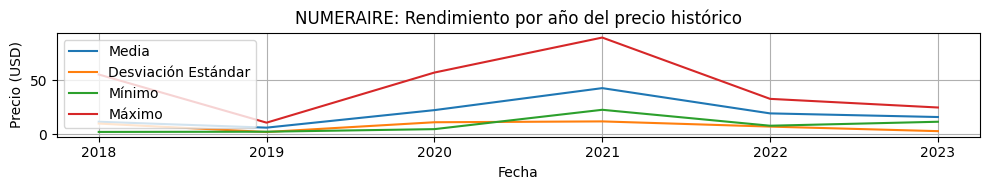

In [39]:
#Plot
plt.figure(figsize=(10, 2))

plt.plot(y8['Anio'], y8['mean'], label='Media')
plt.plot(y8['Anio'], y8['std'], label='Desviación Estándar')
plt.plot(y8['Anio'], y8['min'], label='Mínimo')
plt.plot(y8['Anio'], y8['max'], label='Máximo')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("NUMERAIRE: Rendimiento por año del precio histórico")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* El promedio del precio, en general, ha ido en aumento. En 2018 empezó con valor de 11.491809 USD hasta alcanzar en 2023 los 15.864766 USD promedio.El promedio del precio más alto que ha tenido es en 2021 con un valor de 42.619056. 

+ El punto más alto del precio máx lo tuvo en 2021 con un valor de 89.445451 USD. Obviando este máximo, se podría decir que en general el precio ha ido decreciendo (2018: 55.257653) (2023: 24.681618). 

* En general, el precio mínimo de la moneda ha aumentado a través de los años, en 2018 empezó 2.064247 USD y en 2023 alcanzó un valor de 11.485221. Alcanzando su máximo en 2021 con un valor de 22.560095

* En 2020-2021 se presenta la mayor variabilidad con respecto a la media del precio (11.026364-11.811210). Con respecto 2021-2023 la variabilidad ha ido decreciendo lo que indicaría que el precio se ha ido haciendo más constante. 

# Render

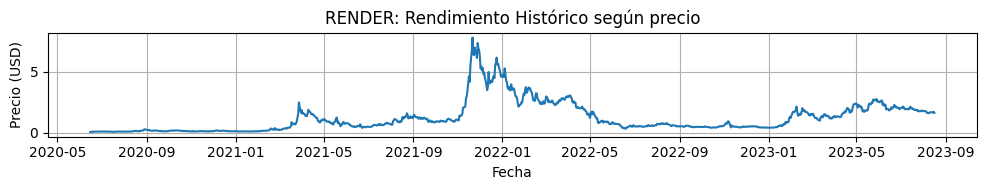

In [40]:
plt.figure(figsize=(10,2))
x_values = df_price['Fecha']
y_values = df_price['Render']
plt.plot(x_values, y_values)

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("RENDER: Rendimiento Histórico según precio")
plt.tight_layout()
plt.grid(True)
plt.show()


In [41]:
#OUTLIERS
outliers_moneda('Render')

Existe un total de 56 outliers, en los años: {2021: 46, 2022: 10} fuera de este rango:[ -1.577128397377936 - 3.731064460573843 ]


In [87]:
#MÁXIMO, MÍNIMO Y PROMEDIO HISTÓRICO
valor_max_min('Render')

{'Máximo Histórico (USD)': 7.82511111071595,
 'Mínimo Histórico (USD)': 0.0511880550152431,
 'Media histórica (USD)': 1.2046055451935174}

Análisis ANUAL del precio histórico de la moneda: Se calcula, promedio,desviación estándar, máx, mín, etc.

In [42]:
#Tabla por año 
render_token_df['fecha'] = pd.to_datetime(render_token_df['fecha'])
render_token_df['Anio'] = render_token_df['fecha'].dt.year
y9=render_token_df.groupby('Anio')['price_render'].describe()
pd.DataFrame(y9)
y9=y9.reset_index()
y9

,Anio,count,mean,std,min,25%,50%,75%,max
0,2020,200.0,0.123158,0.039422,0.051188,0.089808,0.116797,0.147439,0.270418
1,2021,365.0,1.393717,1.627284,0.088891,0.495450,0.901852,1.306138,7.825111
2,2022,365.0,1.327544,1.132757,0.325395,0.500169,0.684744,2.364158,5.288243
3,2023,228.0,1.653690,0.554905,0.402038,1.341878,1.744835,2.018290,2.754201


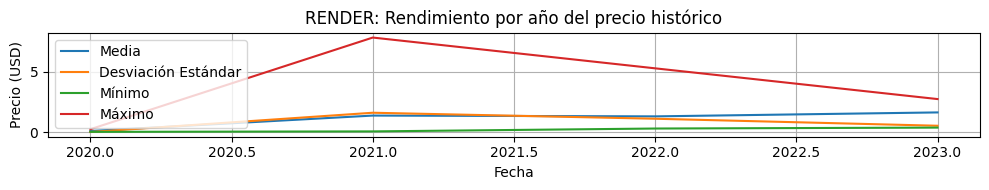

In [43]:
#Plot
plt.figure(figsize=(10, 2))

plt.plot(y9['Anio'], y9['mean'], label='Media')
plt.plot(y9['Anio'], y9['std'], label='Desviación Estándar')
plt.plot(y9['Anio'], y9['min'], label='Mínimo')
plt.plot(y9['Anio'], y9['max'], label='Máximo')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("RENDER: Rendimiento por año del precio histórico")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* El promedio del precio, en general, ha ido en aumento. En 2020 empezó con valor de 0.123158 USD hasta alcanzar en 2023 los 1.653690 USD promedio.El promedio del precio más alto que ha tenido es en 2023. 

+ El punto más alto del precio máx lo tuvo en 2021 con un valor de 7.825111 USD. Obviando este máximo, se podría decir que en general el precio ha ido decreciendo (2020: 0.270418) (2023: 2.754201). 

* En general, el precio mínimo de la moneda ha aumentado a través de los años, en 2020 empezó 0.051188 USD y en 2023 alcanzó un valor de 0.402038. Alcanzando su máximo en 2023.

* En 2021 se presenta la mayor variabilidad con respecto a la media del precio (1.627284). Con respecto 2021-2023 la variabilidad ha ido decreciendo lo que indicaría que el precio se ha ido haciendo más constante. 

# Origintrail

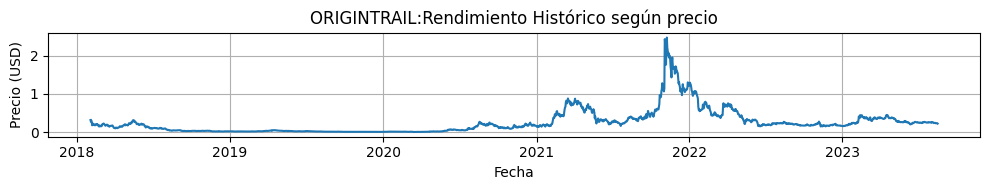

In [44]:
plt.figure(figsize=(10,2))
x_values = df_price['Fecha']
y_values = df_price['Origintrail']
plt.plot(x_values, y_values)

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("ORIGINTRAIL:Rendimiento Histórico según precio")
plt.tight_layout()
plt.grid(True)
plt.show()


In [45]:
#OUTLIERS
outliers_moneda('Origintrail')

Existe un total de 143 outliers, en los años: {2021: 108, 2022: 35} fuera de este rango:[ -0.3805370464269052 - 0.7167002859843596 ]


In [88]:
#MÁXIMO, MÍNIMO Y PROMEDIO HISTÓRICO
valor_max_min('Origintrail')

{'Máximo Histórico (USD)': 2.47553236873948,
 'Mínimo Histórico (USD)': 0.0055142228825075,
 'Media histórica (USD)': 0.2483563980996358}

Análisis ANUAL del precio histórico de la moneda: Se calcula, promedio,desviación estándar, máx, mín, etc.

In [46]:
#Tabla por año 
origintrail_df['fecha'] = pd.to_datetime(origintrail_df['fecha'])
origintrail_df['Anio'] = origintrail_df['fecha'].dt.year
y10=origintrail_df.groupby('Anio')['price_origintrail'].describe()
pd.DataFrame(y10)
y10=y10.reset_index()
y10

,Anio,count,mean,std,min,25%,50%,75%,max
0,2018,333.0,0.107310,0.078904,0.019033,0.034722,0.097298,0.174464,0.319075
1,2019,365.0,0.020468,0.010525,0.006233,0.010863,0.019184,0.025695,0.053539
2,2020,366.0,0.084865,0.074365,0.005514,0.014212,0.061062,0.147047,0.272854
3,2021,365.0,0.622883,0.482518,0.141213,0.299043,0.444891,0.774589,2.475532
4,2022,365.0,0.366160,0.247946,0.149959,0.189530,0.234849,0.492959,1.295445
5,2023,228.0,0.293467,0.070197,0.160210,0.244882,0.265468,0.362044,0.452442


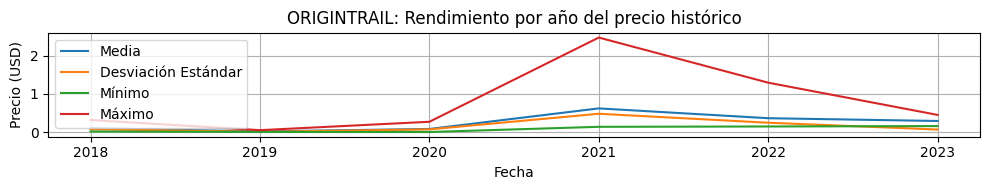

In [47]:
#Plot
plt.figure(figsize=(10, 2))

plt.plot(y10['Anio'], y10['mean'], label='Media')
plt.plot(y10['Anio'], y10['std'], label='Desviación Estándar')
plt.plot(y10['Anio'], y10['min'], label='Mínimo')
plt.plot(y10['Anio'], y10['max'], label='Máximo')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("ORIGINTRAIL: Rendimiento por año del precio histórico")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* El promedio del precio, en general, ha ido en aumento. En 2018 empezó con valor de 0.107310 USD hasta alcanzar en 2023 los 0.293467 USD promedio.El promedio del precio más alto que ha tenido es en 2021 con un valor de 0.622883 USD. 

+ El punto más alto del precio máx lo tuvo en 2021 con un valor de 2.475532 USD. Obviando este máximo, se podría decir que en general el precio ha ido en aumento muy mínimamente (2018:0.319075) (2023: 0.452442). 

* En general, el precio mínimo de la moneda ha aumentado a través de los años, en 2018 empezó 0.019033 USD y en 2023 alcanzó un valor de 0.160210 USD. Alcanzando su máximo en 2023.

* En 2021 se presenta la mayor variabilidad con respecto a la media del precio (0.482518). Con respecto 2018-2020 la variabilidad se ha mantenido constante por lo que quiere decir que el precio se ha mantenido constante. Para 2021 a 2023 la variabilidad ha ido decreciendo lo que indicaría que también para estos años el precio se ha ido haciendo más constante. 

# Comparativa de las 10 monedas: MEDIA, MAX, MIN, STD.

In [62]:
#Promedio,desviación estandar,máx precio, mínimo precio del precio histórico de las monedas total
df_price.describe()

,Insure,Iexec_rlc,Fetch_ai,Everipedia,Singularitynet,Akash,Ocean,Numeraire,Render,Origintrail,Anio
count,1316.000000,2053.000000,1630.000000,1857.000000,2032.000000,1034.000000,1566.000000,2053.000000,1158.000000,2022.000000,2053.000000
mean,0.006460,1.392156,0.225340,0.006953,0.132036,1.605288,0.382415,19.834841,1.204606,0.248356,2020.334145
std,0.009081,1.255359,0.214988,0.006480,0.137202,1.684917,0.359129,14.667453,1.247164,0.318069,1.632512
min,0.000353,0.153815,0.009876,0.000788,0.009853,0.181933,0.012848,2.064247,0.051188,0.005514,2018.000000
25%,0.002485,0.479174,0.056570,0.002362,0.039743,0.341784,0.075146,7.739135,0.413444,0.030927,2019.000000
50%,0.003889,1.069808,0.147230,0.004844,0.056047,0.760781,0.337513,16.299074,0.752634,0.177581,2020.000000
75%,0.006338,1.765603,0.333552,0.009454,0.204262,2.556511,0.531433,28.196499,1.740492,0.305236,2022.000000
max,0.066530,12.959429,0.944649,0.056920,0.950230,7.316592,1.819269,89.445451,7.825111,2.475532,2023.000000


MEDIA DEL PRECIO

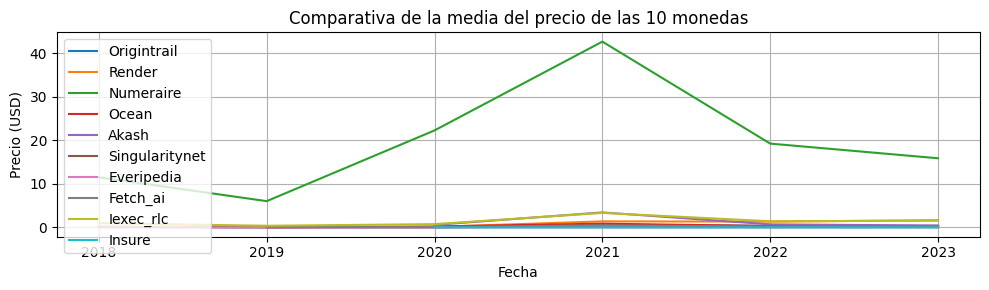

In [83]:
#Plot
plt.figure(figsize=(10,3))

plt.plot(y10['Anio'], y10['mean'], label='Origintrail')
plt.plot(y9['Anio'], y9['mean'], label='Render')
plt.plot(y8['Anio'], y8['mean'], label='Numeraire')
plt.plot(y7['Anio'], y7['mean'], label='Ocean')
plt.plot(y6['Anio'], y6['mean'], label='Akash')
plt.plot(y5['Anio'], y5['mean'], label='Singularitynet')
plt.plot(y4['Anio'], y4['mean'], label='Everipedia')
plt.plot(y3['Anio'], y3['mean'], label='Fetch_ai')
plt.plot(y2['Anio'], y2['mean'], label='Iexec_rlc')
plt.plot(y['Anio'], y['mean'], label='Insure')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("Comparativa de la media del precio de las 10 monedas")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* El precio promedio anual más alto lo tiene lo tiene Numeraire
* El precio promedio anual más bajo lo tiene lo tiene Insure y Everipedia
* Todas las monedas aumentaron su precio promedio en 2021, sin embargo, después de ese pico casi todas bajaron su precio promedio excepto Render, el cual incluso ha aumentado.

DESVIACIÓN ESTÁNDAR

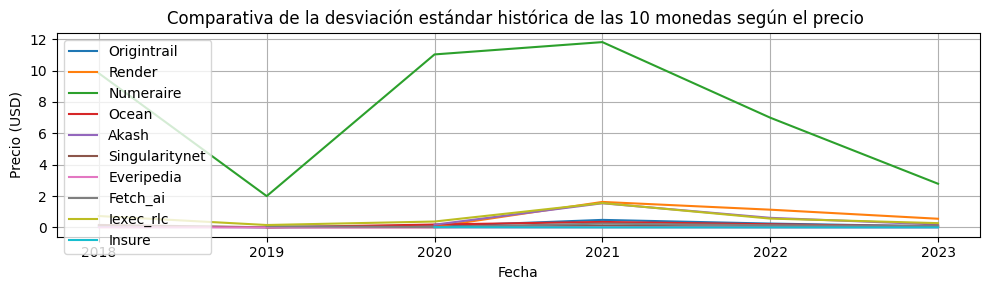

In [49]:
#Plot
plt.figure(figsize=(10, 3))

plt.plot(y10['Anio'], y10['std'], label='Origintrail')
plt.plot(y9['Anio'], y9['std'], label='Render')
plt.plot(y8['Anio'], y8['std'], label='Numeraire')
plt.plot(y7['Anio'], y7['std'], label='Ocean')
plt.plot(y6['Anio'], y6['std'], label='Akash')
plt.plot(y5['Anio'], y5['std'], label='Singularitynet')
plt.plot(y4['Anio'], y4['std'], label='Everipedia')
plt.plot(y3['Anio'], y3['std'], label='Fetch_ai')
plt.plot(y2['Anio'], y2['std'], label='Iexec_rlc')
plt.plot(y['Anio'], y['std'], label='Insure')


plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("Comparativa de la desviación estándar histórica de las 10 monedas según el precio ")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

La variabilidad en las monedas ha permanecido casi estable para todas a través del tiempo. Sin embargo, todas poseen un pico en el año 2021, lo cual se relaciona con el aumento en el precio de todas las monedas.La moneda con mayor desviación estandar pertenece a Numeraire. Después de ese pico en 2021, la variabilidad ha ido decreciendo lo que significa que el precio se ha ido estabilizando, es decir ha ido disminuyendo la variación de este. 

MÍNIMO

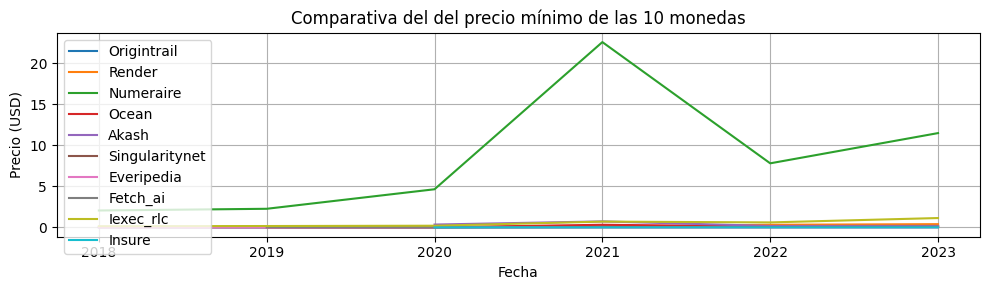

In [50]:
#Plot
plt.figure(figsize=(10,3))


plt.plot(y10['Anio'], y10['min'], label='Origintrail')
plt.plot(y9['Anio'], y9['min'], label='Render')
plt.plot(y8['Anio'], y8['min'], label='Numeraire')
plt.plot(y7['Anio'], y7['min'], label='Ocean')
plt.plot(y6['Anio'], y6['min'], label='Akash')
plt.plot(y5['Anio'], y5['min'], label='Singularitynet')
plt.plot(y4['Anio'], y4['min'], label='Everipedia')
plt.plot(y3['Anio'], y3['min'], label='Fetch_ai')
plt.plot(y2['Anio'], y2['min'], label='Iexec_rlc')
plt.plot(y['Anio'], y['min'], label='Insure')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("Comparativa del del precio mínimo de las 10 monedas")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* El precio mínimo más bajo lo tiene Everipedia e Insure
* Todas las monedas aumentaron su precio mínimo en 2021.
* Numeraire es la monena que posee el precio mínimo más alto

MÁXIMO

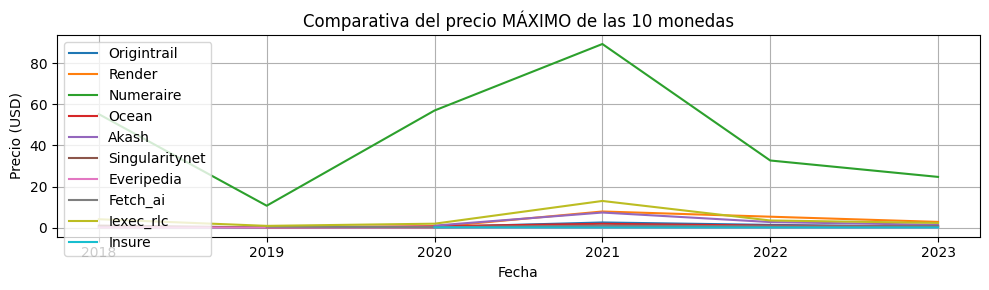

In [51]:
#Plot
plt.figure(figsize=(10,3))

plt.plot(y10['Anio'], y10['max'], label='Origintrail')
plt.plot(y9['Anio'], y9['max'], label='Render')
plt.plot(y8['Anio'], y8['max'], label='Numeraire')
plt.plot(y7['Anio'], y7['max'], label='Ocean')
plt.plot(y6['Anio'], y6['max'], label='Akash')
plt.plot(y5['Anio'], y5['max'], label='Singularitynet')
plt.plot(y4['Anio'], y4['max'], label='Everipedia')
plt.plot(y3['Anio'], y3['max'], label='Fetch_ai')
plt.plot(y2['Anio'], y2['max'], label='Iexec_rlc')
plt.plot(y['Anio'], y['max'], label='Insure')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("Comparativa del precio MÁXIMO de las 10 monedas")
plt.tight_layout()
plt.grid(True)

# Agregar leyenda para identificar las series
plt.legend()

plt.show()

* El precio máximo más bajo lo tiene Singularitynet e Insure
* Todas las monedas aumentaron su precio máximo en 2021 y posterior a ese pico, el precio máximo de todas las monedas disminuyó.
* Numeraire es la monena que posee el precio máximo más alto

MATRIZ DE CORRELACIÓN

C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_10812\3579116456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_correlacion= total_data_historica.corr()


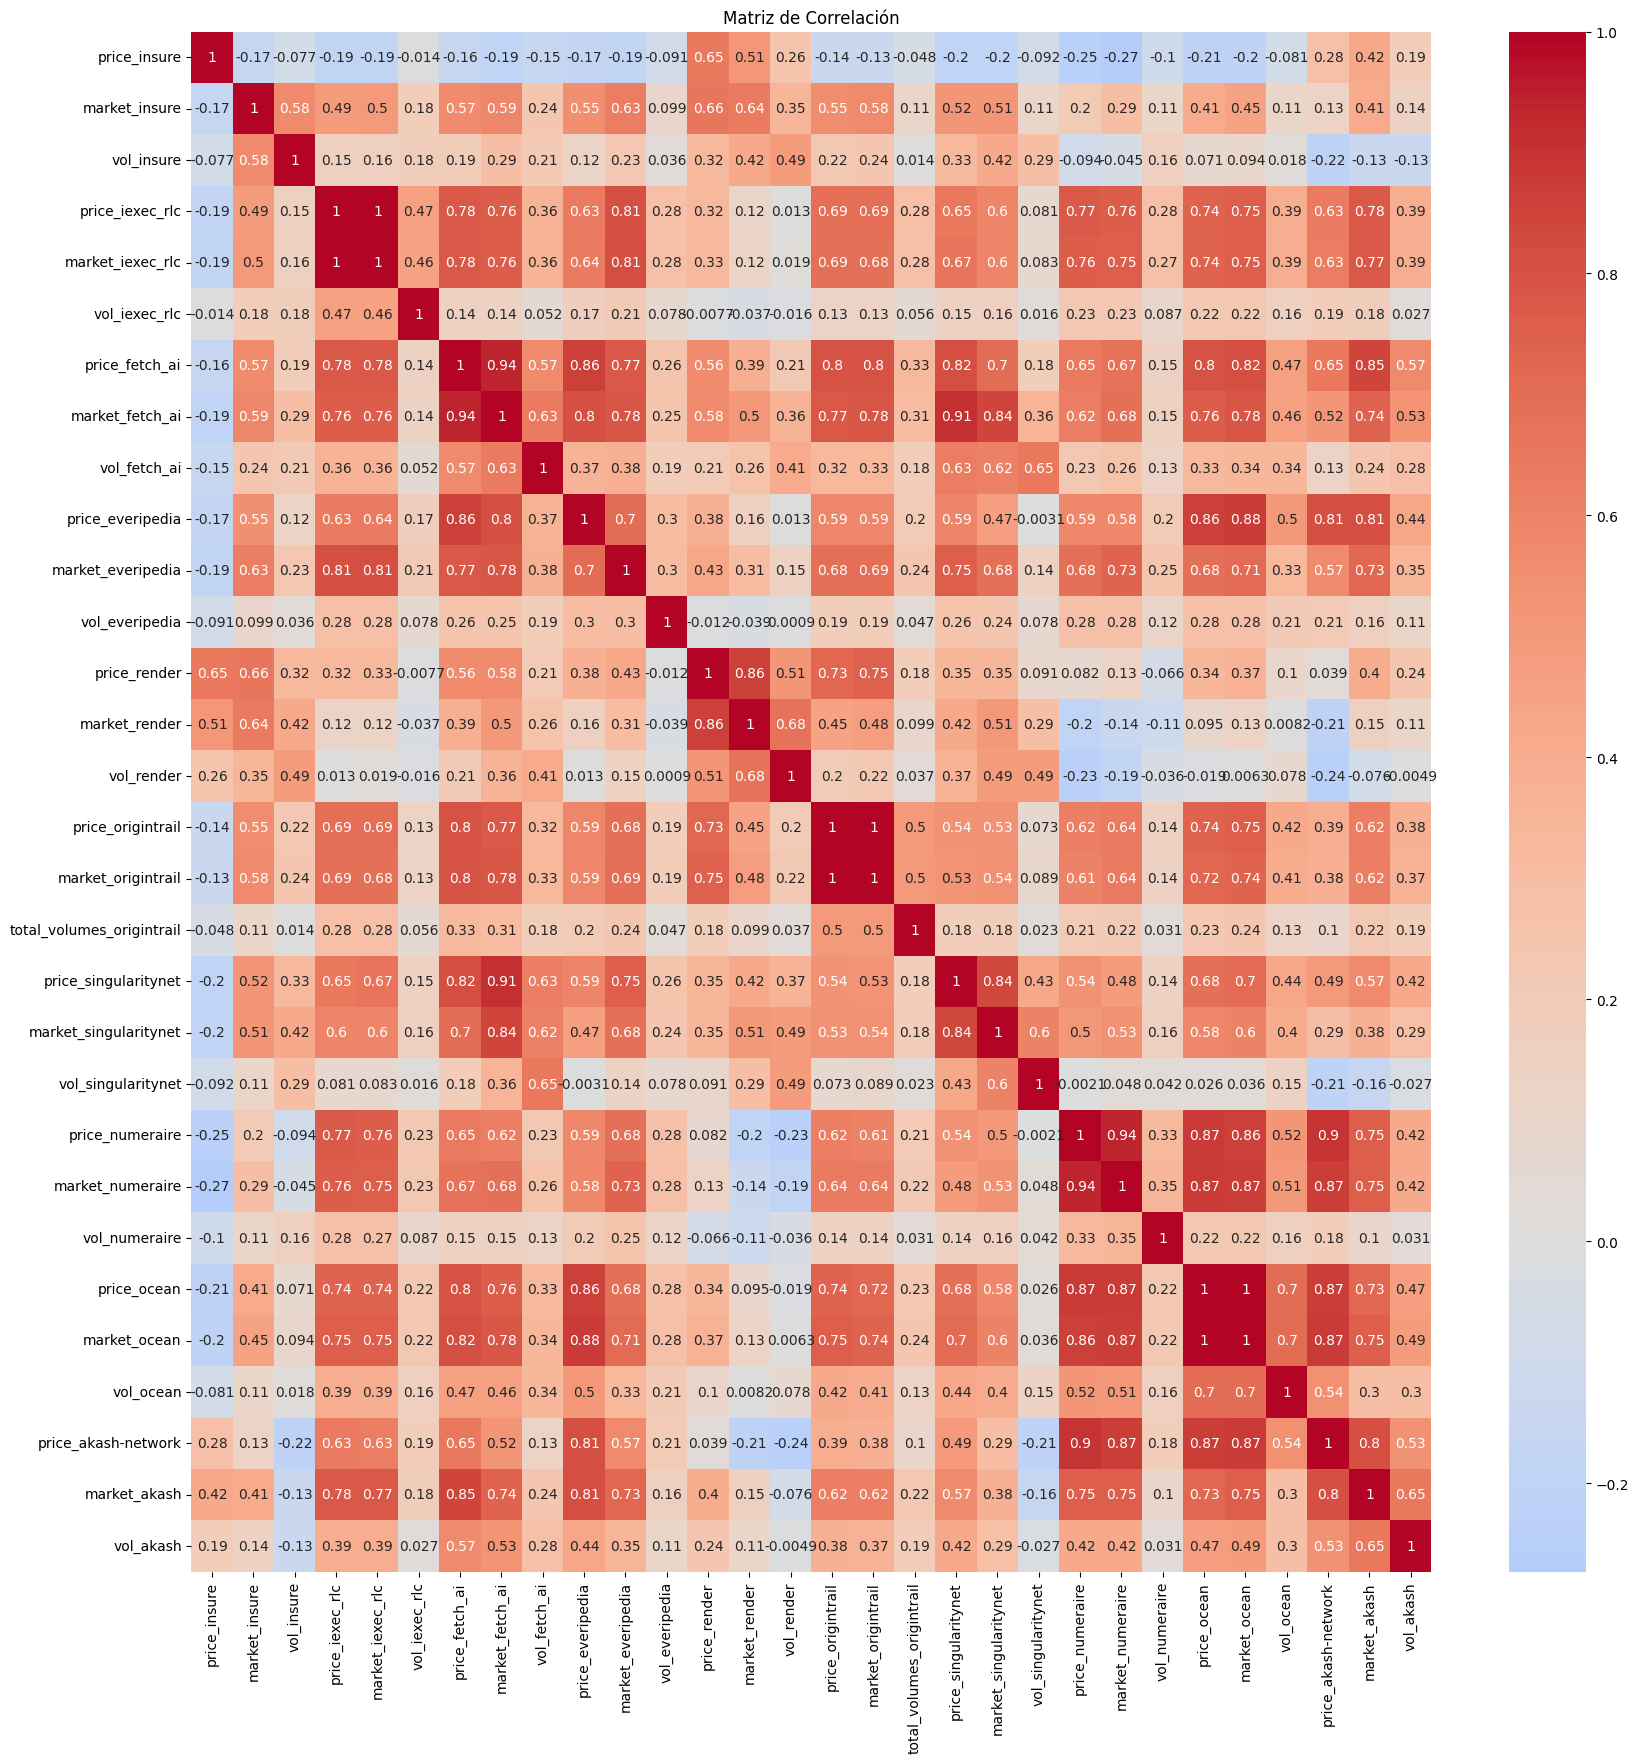

In [81]:
matrix_correlacion= total_data_historica.corr()
plt.figure(figsize=(20, 20))
sbn.heatmap(matrix_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

En el siguiente diagrama de correlación se observa que entre los colores sean más claros indican correlaciones más altas y cuando los colores sean más oscuros indican correlaciones más bajas:

+ Las correlaciones más altas (1) se pueden observar para las variables: precio-market_cap de la moneda Iexec, precio-market_cap de la moneda Ocean y precio-market_cap de la moneda Origintrail.  En otras palabras, hay una tendencia en la que ambos valores tienden a moverse en la misma dirección, es decir, cuando una aumenta la otra también. Por ejemplo cuando aumenta el precio de la moneda Iexec, el market_cap también aumenta. 

+ Ninguna de las posibles relaciones entre las variables precio-market_cap-volumen presenta una correlación negativa. Esto quiere decir que si alguna de las variables aumentó de valor las demás también. 

+ El precio de Numeraire y Akash presentan una relación positiva de (0.9). Sin embargo, hay que tomar en cuenta que para Akash sólo tenemos registros desde el 2020 mientras que para Numeraire desde 2018 (lo que puede influir en la relación obtenida)


#  Tendencias en la capitalización del mercado 

Comparativa de las 10 monedas: Market 

In [141]:
df_market
df_market['Fecha'] = pd.to_datetime(df_market['Fecha'])
df_market['Anio'] = df_market['Fecha'].dt.year
df_market
y11=df_market.groupby('Anio').describe()
pd.DataFrame(y10)
y11=y11.reset_index()



Anio Insure                                                          \
         count          mean           std           min           25%   
0  2018    0.0           NaN           NaN           NaN           NaN   
1  2019    0.0           NaN           NaN           NaN           NaN   
2  2020  358.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3  2021  365.0  9.276093e+07  6.064005e+07  0.000000e+00  8.568095e+07   
4  2022  365.0  1.125331e+08  4.866446e+07  4.969401e+07  6.740971e+07   
5  2023  228.0  1.061946e+08  4.255942e+07  4.983539e+07  7.071546e+07   

                                            Iexec_rlc  ...        Render  \
            50%           75%           max     count  ...           75%   
0           NaN           NaN           NaN     364.0  ...           NaN   
1           NaN           NaN           NaN     365.0  ...           NaN   
2  0.000000e+00  0.000000e+00  0.000000e+00     366.0  ...  3.359097e+06   
3  8.568095e+07  9.654914e+07  2.929475e+08     365.0  ...  2.016735e+08   
4  1.012408e+08  1.516761e+08  2.617007e+08     365.0  ...  4.366580e+08   
5  1.001021e+08  1.215005e+08  2.158373e+08     228.0  ...  7.325923e+08   

                Origintrail                                            \
            max       count          mean           std           min   
0           NaN       333.0  2.810435e+07  2.025839e+07  0.000000e+00   
1           NaN       365.0  5.855895e+06  2.994316e+06  1.806340e+06   
2  2.612530e+07       366.0  2.458667e+07  2.156579e+07  1.587663e+06   
3  1.208197e+09       365.0  2.236860e+08  1.792733e+08  4.036913e+07   
4  8.182699e+08       365.0  1.350878e+08  9.151514e+07  5.502094e+07   
5  1.010381e+09       228.0  1.123412e+08  2.705395e+07  5.921492e+07   

                                                           
            25%           50%           75%           max  
0  9.599856e+06  2.601841e+07  4.438613e+07  8.493137e+07  
1  3.116741e+06  5.482105e+06  7.340655e+06  1.528149e+07  
2  4.151146e+06  1.773720e+07  4.237931e+07  7.854098e+07  
3  1.067156e+08  1.513677e+08  2.782024e+08  8.976057e+08  
4  7.009395e+07  8.651530e+07  1.814153e+08  5.037317e+08  
5  9.369913e+07  1.018057e+08  1.391463e+08  1.729498e+08  

[6 rows x 81 columns]

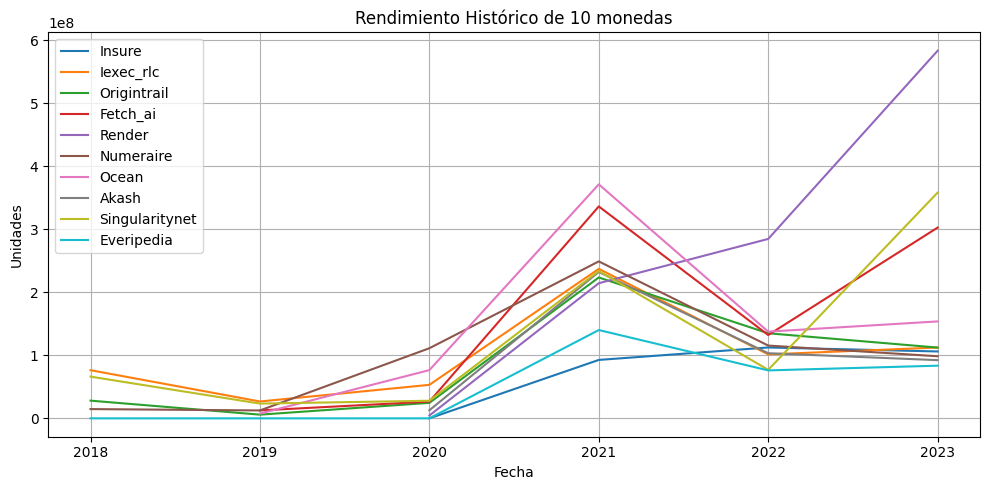

In [156]:
# Gráfico del promedio por año según el market cap de cada moneda
plt.figure(figsize=(10,5))

plt.plot(y11['Anio'], y11['Insure']['mean'], label='Insure')
plt.plot(y11['Anio'], y11['Iexec_rlc']['mean'], label='Iexec_rlc')
plt.plot(y11['Anio'], y11['Origintrail']['mean'], label='Origintrail')
plt.plot(y11['Anio'], y11['Fetch_ai']['mean'], label='Fetch_ai')
plt.plot(y11['Anio'], y11['Render']['mean'], label='Render')
plt.plot(y11['Anio'], y11['Numeraire']['mean'], label='Numeraire')
plt.plot(y11['Anio'], y11['Ocean']['mean'], label='Ocean')
plt.plot(y11['Anio'], y11['Akash']['mean'], label='Akash')
plt.plot(y11['Anio'], y11['Singularitynet']['mean'], label='Singularitynet')
plt.plot(y11['Anio'], y11['Everipedia']['mean'], label='Everipedia')

plt.xlabel("Fecha")
plt.ylabel("Unidades")
plt.title("Rendimiento Histórico de 10 monedas")
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

En este fráfico se puede observar el rendimiento histórico del market_cap a traves de 5 años de los 10 tokens. 
La columna Market indica el valor total de todas las unidades de la criptomoneda en circulación. 

+ El token que tienen una capitalización de mercado consistentemente alta en comparación con otros es Render. En el año 2022 Render supera a los demás tokens en términos de capitalización, significa que el valor total de ese token en circulación es significativamente mayor y más estable en el tiempo en comparación con los valores de capitalización de mercado de los demás. Puede ser por varios factores:  existe un alto nivel de confianza en la criptomoneda por parte de los inversores y usuarios,demanda, Resistencia a la Volatilidad,mayor visibilidad en los medios y la industria de las criptomonedas,etc. 

+ Todas las monedas (Excepto Render) poseen el pico más alto en el año 2021 y después decaen con respecto al número de unidades en circulación. 

#  Tendencias de Volumen

Comparativa de las 10 monedas: Volumen

El volumen en el contexto de las criptomonedas se refiere al volumen de transacciones que se realizan con una criptomoneda específica durante un período de tiempo determinado, en este caso de 2018-2023. El volumen representa la cantidad total de una criptomoneda en específico que se ha comprado o vendido en un mercado durante ese período.

In [150]:
df_volumen
df_volumen['Fecha'] = pd.to_datetime(df_volumen['Fecha'])
df_volumen['Anio'] = df_volumen['Fecha'].dt.year
df_volumen
y12=df_volumen.groupby('Anio').describe()
pd.DataFrame(y12)
y12=y12.reset_index()

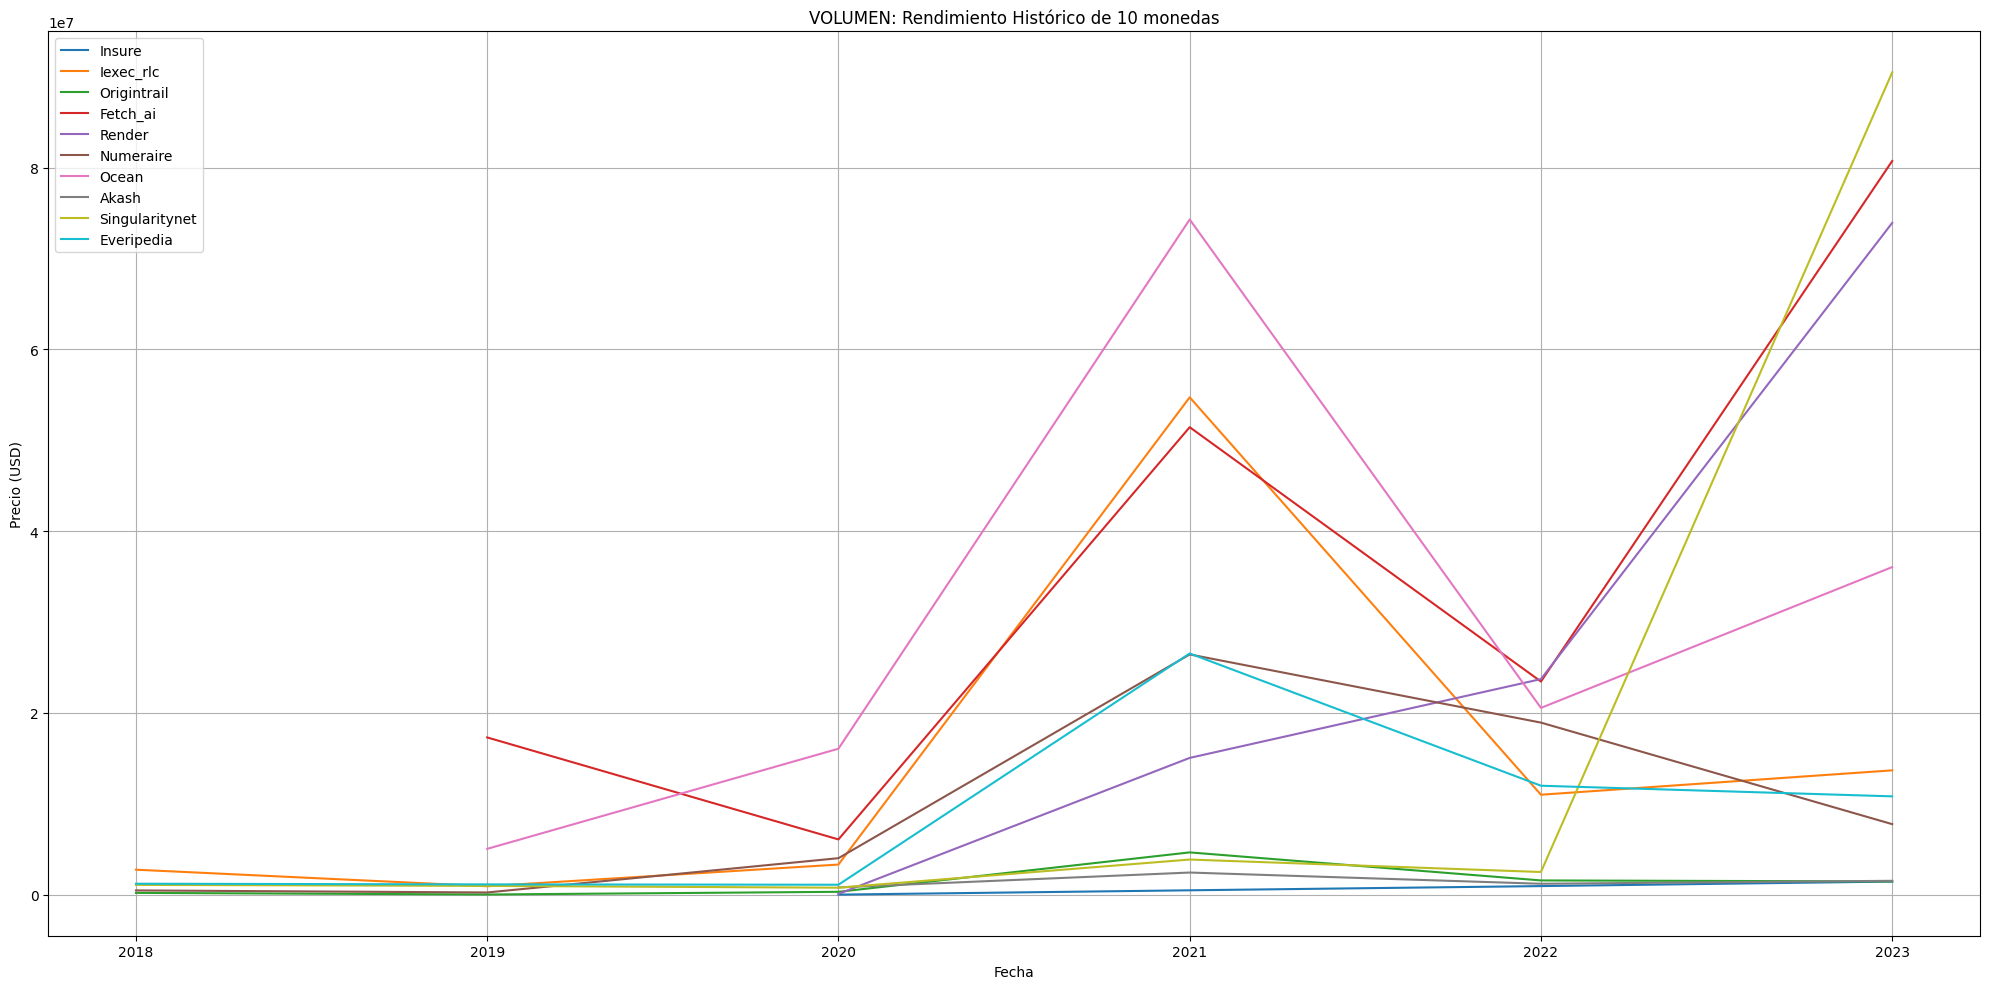

In [160]:
# Gráfico del promedio por año según el volumen de cada moneda
plt.figure(figsize=(20,10))

plt.plot(y12['Anio'], y12['Insure']['mean'], label='Insure')
plt.plot(y12['Anio'], y12['Iexec_rlc']['mean'], label='Iexec_rlc')
plt.plot(y12['Anio'], y12['Origintrail']['mean'], label='Origintrail')
plt.plot(y12['Anio'], y12['Fetch_ai']['mean'], label='Fetch_ai')
plt.plot(y12['Anio'], y12['Render']['mean'], label='Render')
plt.plot(y12['Anio'], y12['Numeraire']['mean'], label='Numeraire')
plt.plot(y12['Anio'], y12['Ocean']['mean'], label='Ocean')
plt.plot(y12['Anio'], y12['Akash']['mean'], label='Akash')
plt.plot(y12['Anio'], y12['Singularitynet']['mean'], label='Singularitynet')
plt.plot(y12['Anio'], y12['Everipedia']['mean'], label='Everipedia')

plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("VOLUMEN: Rendimiento Histórico de 10 monedas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


+ En el año 2021, todas las monedas presentan un aumento en el promedio anual de volumen de transacción. Sin embargo, sólo Render siguió creciendo continuamente. Las demás monedas presentan un descenso en dicho volumen para 2022. 

+ La única moneda que presentó un aumento significativo en su volumen de un año a otro (en este caso 2022-20223) es Singularitynet. Superando a todas las demás monedas.Un aumento repentino en el volumen puede ser un indicativo de que algo importante está ocurriendo con respecto a esa criptomoneda. Si nos fijamos en el precio de Singularitynet vemos que de 2022 a 2023 aumentó lo que podría sugerir que los inversores están comprando.

#  KPI: Retorno de Inversión (ROI)

In [6]:
# Se crea una función para calcular el ROI (Retorno de la Inversión) de todas las monedas 

def funcion_roi(columna: str):
    precio_inicial = next((valor for valor in df_price[columna] if not np.isnan(valor)), None)
    precio_actual= df_price[df_price['Fecha']=='2023-08-16'][columna].iloc[0]
    ganancia=precio_actual-precio_inicial
    roi=(ganancia/precio_inicial) *100
    return roi

# Lista de columnas del dataframe df_price
columnas_monedas = df_price.columns

# Crear un nuevo DataFrame para almacenar los resultados
df_roi = pd.DataFrame(columns=['Token', 'ROI'])

# Se aplica la función a todas las columnas del dataframe con excepción de Fecha y Anio
#Devuelve un dataframe nuevo con la información 
for columna in columnas_monedas:
    if columna != 'Fecha'and columna != 'Anio':  
        roi = funcion_roi(columna)
        df_roi = df_roi.append({'Token': columna, 'ROI': roi}, ignore_index=True)

df_roi

C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_6432\1819272518.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_roi = df_roi.append({'Token': columna, 'ROI': roi}, ignore_index=True)
C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_6432\1819272518.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_roi = df_roi.append({'Token': columna, 'ROI': roi}, ignore_index=True)
C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_6432\1819272518.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_roi = df_roi.append({'Token': columna, 'ROI': roi}, ignore_index=True)
C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_6432\1819272518.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

,Token,ROI
0,Insure,-91.218358
1,Iexec_rlc,-44.269593
2,Fetch_ai,-42.719280
3,Everipedia,-90.984077
4,Singularitynet,-76.936813
5,Akash,187.267898
6,Ocean,735.801235
7,Numeraire,-66.968076
8,Render,3077.795278
9,Origintrail,-29.385068


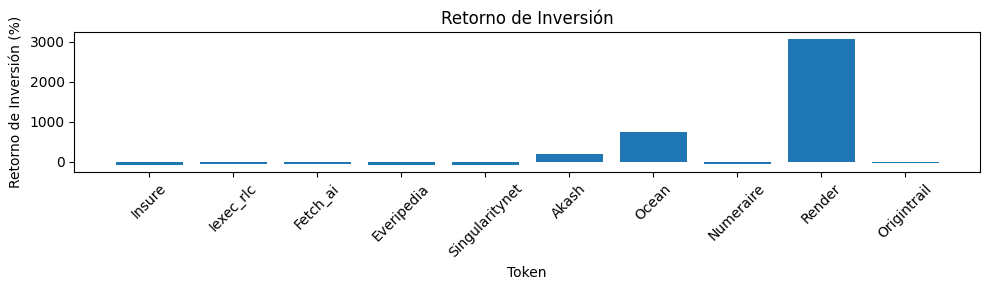

In [7]:
plt.figure(figsize=(10, 3))
plt.bar(df_roi['Token'], df_roi['ROI'])
plt.xlabel('Token')
plt.ylabel('Retorno de Inversión (%)')
plt.title('Retorno de Inversión')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El ROi se calcula en el supuesto de haber comprado de cualquiera de las monedas, un único token, al inicio de su ciclo de vida, es decir en el año 2018.
+ Las únicas monedas que presentan un retorno de inversión positivio son: Render, Ocean y Akash 
+ La moneda que posee el retorno de inversión más alto es Render. 
+ La moneda que posee el retorno de inversión más bajo es Insure. 

# KPI: Crecimiento de la capitalización

Muestra tanto los valores absolutos iniciales y finales de la capitalización de mercado como el porcentaje de crecimiento correspondiente para cada token.

In [27]:
#lista de dataframes
lista_dataframes= [akash_df,
singularitynet_df,
render_token_df,
origintrail_df,
ocean_df,
numeraire_df,
insure_df,
iexec_rlc_df,
fetch_ai_df,
everipedia_df]

In [92]:
#Se calcula el crecimiento de la capitalización de mercado para cada moneda
#insure
market_inicial = next((valor for valor in insure_df['vol_insure'] if not np.isnan(valor)), None)
market_ultimo= insure_df[insure_df['fecha']=='2023-08-16']['vol_insure'].iloc[0]
crecimiento= ((market_ultimo - market_inicial) / market_inicial) * 100
crecimiento
# akash_df
market_inicial_1 = next((valor for valor in akash_df['vol_akash'] if not np.isnan(valor)), None)
market_ultimo_1= akash_df[akash_df['fecha']=='2023-08-16']['vol_akash'].iloc[0]
crecimiento_1= ((market_ultimo_1 - market_inicial_1) / market_inicial_1) * 100
crecimiento_1
#singularitynet
market_inicial_2 = next((valor for valor in singularitynet_df['vol_singularitynet'] if not np.isnan(valor)), None)
market_ultimo_2= singularitynet_df[singularitynet_df['fecha']=='2023-08-16']['vol_singularitynet'].iloc[0]
crecimiento_2= ((market_ultimo_2 - market_inicial_2) / market_inicial_2) * 100
crecimiento_2
#render
market_inicial_3 = next((valor for valor in render_token_df['vol_render'] if not np.isnan(valor)), None)
market_ultimo_3= render_token_df[render_token_df['fecha']=='2023-08-16']['vol_render'].iloc[0]
crecimiento_3= ((market_ultimo_3 - market_inicial_3) / market_inicial_3) * 100
crecimiento_3
#origintrail
market_inicial_4 = next((valor for valor in origintrail_df['total_volumes_origintrail'] if not np.isnan(valor)), None)
market_ultimo_4= origintrail_df[origintrail_df['fecha']=='2023-08-16']['total_volumes_origintrail'].iloc[0]
crecimiento_4= ((market_ultimo_4 - market_inicial_4) / market_inicial_4) * 100
crecimiento_4
# ocean
market_inicial_5 = next((valor for valor in ocean_df['vol_ocean'] if not np.isnan(valor)), None)
market_ultimo_5= ocean_df[ocean_df['fecha']=='2023-08-16']['vol_ocean'].iloc[0]
crecimiento_5= ((market_ultimo_5 - market_inicial_5) / market_inicial_5) * 100
crecimiento_5
#numeraire
market_inicial_6 = next((valor for valor in numeraire_df['vol_numeraire'] if not np.isnan(valor)), None)
market_ultimo_6= numeraire_df[numeraire_df['fecha']=='2023-08-16']['vol_numeraire'].iloc[0]
crecimiento_6= ((market_ultimo_6 - market_inicial_6) / market_inicial_6) * 100
crecimiento_6
#iexec_rlc_df
market_inicial_7 = next((valor for valor in iexec_rlc_df['vol_iexec_rlc'] if not np.isnan(valor)), None)
market_ultimo_7= iexec_rlc_df[iexec_rlc_df['fecha']=='2023-08-16']['vol_iexec_rlc'].iloc[0]
crecimiento_7= ((market_ultimo_7 - market_inicial_7) / market_inicial_7) * 100
crecimiento_7
#fetch_ai_df
market_inicial_8 = next((valor for valor in fetch_ai_df['vol_fetch_ai'] if not np.isnan(valor)), None)
market_ultimo_8= fetch_ai_df[fetch_ai_df['fecha']=='2023-08-16']['vol_fetch_ai'].iloc[0]
crecimiento_8= ((market_ultimo_8 - market_inicial_8) / market_inicial_8) * 100
crecimiento_8
#everipedia
market_inicial_9 = next((valor for valor in everipedia_df['vol_everipedia'] if not np.isnan(valor)), None)
market_ultimo_9 = everipedia_df[everipedia_df['fecha']=='2023-08-16']['vol_everipedia'].iloc[0]
crecimiento_9 = ((market_ultimo_9  - market_inicial_9 ) / market_inicial_9 ) * 100
crecimiento_9 


df_crecimiento = pd.DataFrame({
'Token':['insure', 'akash_df','singularitynet','render', 'origintrail', 'ocean', 'numeraire', 'iexec', 'fetch_ai', 'everipedia'],
'Inicial':[market_inicial,market_inicial_1,market_inicial_2,market_inicial_3, market_inicial_4, market_inicial_5,market_inicial_6,market_inicial_7,market_inicial_8,market_inicial_9],
'Ultimo':[market_ultimo,market_ultimo_1,market_ultimo_2,market_ultimo_3,market_ultimo_4,market_ultimo_5,market_ultimo_6,market_ultimo_7,market_ultimo_8,market_ultimo_9],
'Crecimiento':[crecimiento,crecimiento_1,crecimiento_2,crecimiento_3,crecimiento_4,crecimiento_5,crecimiento_6,crecimiento_7,crecimiento_8,crecimiento_9]
})


df_crecimiento

,Token,Inicial,Ultimo,Crecimiento
0,insure,3.587582e+03,2.177563e+03,-39.302760
1,akash_df,1.498616e+06,2.517306e+06,67.975392
2,singularitynet,1.873402e+06,3.316031e+07,1670.058453
3,render,2.201840e+04,2.128357e+07,96562.644159
4,origintrail,1.688170e+06,1.133187e+06,-32.874844
5,ocean,9.424766e+05,2.140582e+07,2171.230589
6,numeraire,4.027714e+06,3.629881e+06,-9.877379
7,iexec,6.299613e+06,6.836781e+06,8.526988
8,fetch_ai,1.407394e+08,3.675603e+07,-73.883619
9,everipedia,1.820751e+06,3.016921e+06,65.696542


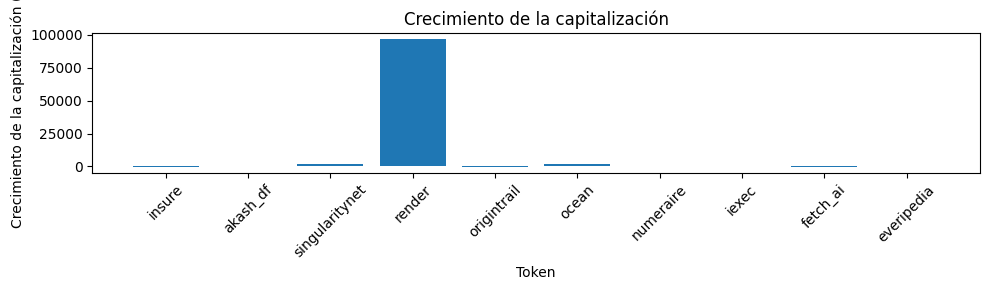

In [94]:

plt.figure(figsize=(10, 3))
plt.bar(df_crecimiento['Token'],df_crecimiento['Crecimiento'])
plt.xlabel('Token')
plt.ylabel('Crecimiento de la capitalización (%)')
plt.title('Crecimiento de la capitalización')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

+ Las monedas que presentan un crecimiento negativo en la capitalización de mercado son: insure y fetch_ai. Esto significa que el valor total de la criptomoneda  ha disminuido en un período de tiempo específico( en este caso 5 años) puede estar relacionado con varios factores, como la disminución del interés de los inversores, la percepción de problemas en el proyecto subyacente, noticias negativas en el mercado, cambios en la oferta y demanda, fluctuaciones en el precio, y más.

+ La moneda que presenta el mayor crecimiento en la capitalización de mercado es Render con un valor de 96562.644159. Lo que significa que el valor total de Render ha aumentado en esa cantidad en el lapso de 5 años. Un crecimiento tan alto en la capitalización de mercado, como en el caso de Render, podría ser el resultado de un aumento considerable en el precio de la criptomoneda y/o un aumento en la cantidad de tokens en circulación.